<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/ExplNode02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 (1) 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [54]:
import os
from turtle import shape
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

---
## (1) 데이터 가져오기

In [55]:
diabetes=load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [56]:
diabetes['data'].shape

(442, 10)

In [57]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [58]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [59]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [60]:
df_X = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df_y = pd.Series(diabetes['target'])

* 전체 feature는 10가지

In [63]:
NUM_FEATURES = 10

* NaN 값 찾아내기

In [62]:
기## finding NaN
board_NaN = ''
if sum(np.isnan(df_X['age'])) != 0: board_NaN.append('age')
if sum(np.isnan(df_X['sex'])) != 0: board_NaN.append('-sex')
if sum(np.isnan(df_X['bmi'])) != 0: board_NaN.append('-bmi')
if sum(np.isnan(df_X['bp']))  != 0: board_NaN.append('-bp')
if sum(np.isnan(df_X['s1']))  != 0: board_NaN.append('-s1')
if sum(np.isnan(df_X['s2']))  != 0: board_NaN.append('-s2')
if sum(np.isnan(df_X['s3']))  != 0: board_NaN.append('-s3')
if sum(np.isnan(df_X['s4']))  != 0: board_NaN.append('-s4')
if sum(np.isnan(df_X['s5']))  != 0: board_NaN.append('-s5')
if sum(np.isnan(df_X['s6']))  != 0: board_NaN.append('-s6')
if sum(np.isnan(df_y))        != 0: board_NaN.append('-y')
if board_NaN == '': 
  print("Nothing")
else:
  print(board_NaN)

Nothing


* OUTLILER 찾아내기

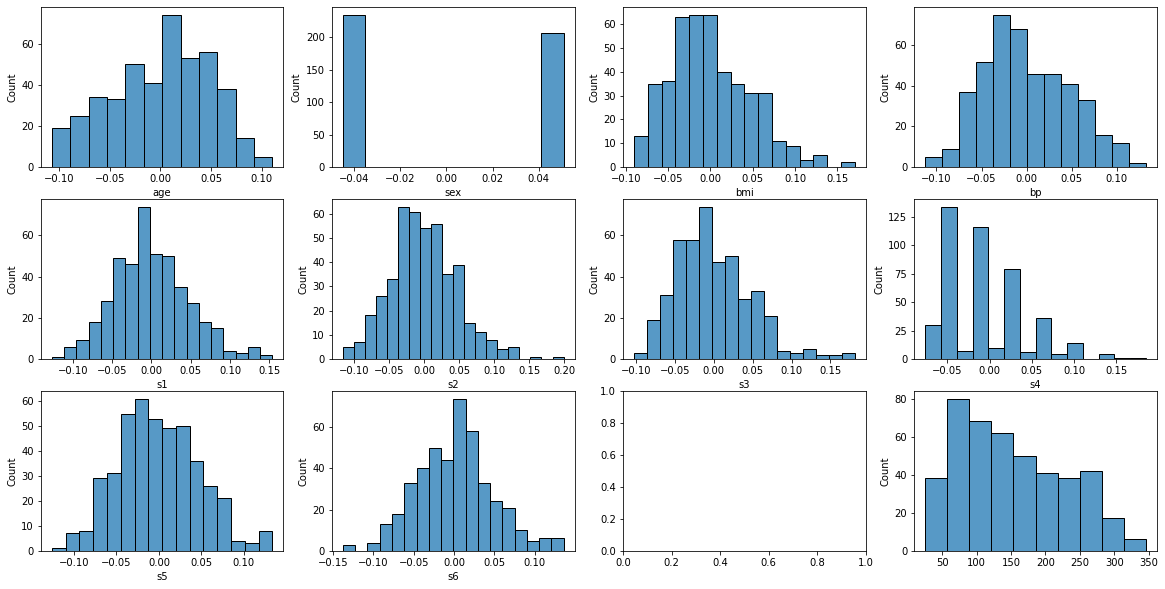

In [ ]:
## finding outlier
fig, axes= plt.subplots(3,4)
plt.rcParams["figure.figsize"] = (20, 10)
sns.histplot(df_X['age'], ax=axes[0, 0])
sns.histplot(df_X['sex'], ax=axes[0, 1])
sns.histplot(df_X['bmi'], ax=axes[0, 2])
sns.histplot(df_X['bp'], ax=axes[0, 3])
sns.histplot(df_X['s1'], ax=axes[1, 0])
sns.histplot(df_X['s2'], ax=axes[1, 1])
sns.histplot(df_X['s3'], ax=axes[1, 2])
sns.histplot(df_X['s4'], ax=axes[1, 3])
sns.histplot(df_X['s5'], ax=axes[2, 0])
sns.histplot(df_X['s6'], ax=axes[2, 1])
sns.histplot(df_y, ax=axes[2, 3])
fig.show(기

---
## (2) 모델에 입력할 데이터 X 준비하기

In [64]:
X = np.array(df_X)          # X = df_X.to_numpy()
X.shape

(442, 10)

---
## (3) 모델에 입력할 데이터 y 준비하기

In [65]:
y = np.array(df_y)         # y = df_y.to_numpy()
y.shape

(442,)

---
## (4) train 데이터와 test 데이터로 분리하기

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

---
## (5) 모델 준비하기

In [67]:
def model(X, W, b):
    predictions = 0
    for i in range(NUM_FEATURES):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

---
## (6) 손실함수 및 loss 정의하기

In [68]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [69]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

---
## (7) 기울기를 구하는 gradient 함수 구현하기

In [70]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

---
## (8) 하이퍼 파라미터인 학습률 설정하기

In [71]:
LEARNING_RATE = 0.45             # the result of try and error

---
## (9) 모델 학습하기
### 9-1) 상관계수 분석하기

In [72]:
print(np.corrcoef(X.T[0], y))                   # age
print(np.corrcoef(X.T[1], y))                   # sex
print(np.corrcoef(X.T[2], y))                   # bmi
print(np.corrcoef(X.T[3], y))                   # bp
print(np.corrcoef(X.T[4], y))                   # s1
print(np.corrcoef(X.T[5], y))                   # s2
print(np.corrcoef(X.T[6], y))                   # s3
print(np.corrcoef(X.T[7], y))                   # s4
print(np.corrcoef(X.T[8], y))                   # s5
print(np.corrcoef(X.T[9], y))                   # s6

[[1.         0.18788875]
 [0.18788875 1.        ]]
[[1.       0.043062]
 [0.043062 1.      ]]
[[1.         0.58645013]
 [0.58645013 1.        ]]
[[1.         0.44148385]
 [0.44148385 1.        ]]
[[1.         0.21202248]
 [0.21202248 1.        ]]
[[1.         0.17405359]
 [0.17405359 1.        ]]
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
[[1.         0.43045288]
 [0.43045288 1.        ]]
[[1.         0.56588343]
 [0.56588343 1.        ]]
[[1.         0.38248348]
 [0.38248348 1.        ]]



*   상관계수가 가장 낮은 's3' feature를 제거한다.

In [73]:
X_train_del = np.delete(X_train, 6, 1)            # s3
X_test_del = np.delete(X_test, 6, 1)              # s3

* FEATURE수를 10에서 9로 줄인다

In [74]:
NUM_FEATURES = 9

* 학습시키기

In [75]:
losses = []
num_iterations = 10000

W = np.random.rand(NUM_FEATURES)
b = np.random.rand()

for i in range(1, (num_iterations + 1)):
    dW, db = gradient(X_train_del, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train_del, W, b, y_train)
    losses.append(L)

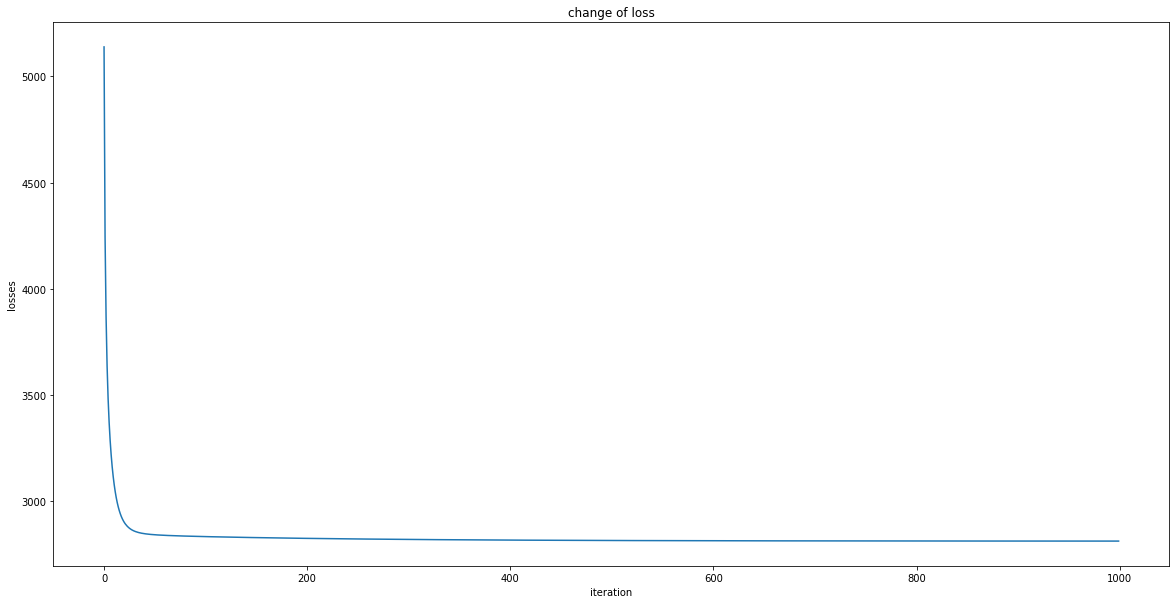

In [77]:
plt.plot(losses[:1000])
plt.title('change of loss')
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()    

## (10) test 데이터에 대한 성능 확인하기

In [78]:
prediction = model(X_test_del, W, b)
mse = loss(X_test_del, W, b, y_test)
print(mse)

3110.6662495496653


## (11) 정답 데이터와 예측한 데이터 시각화하기

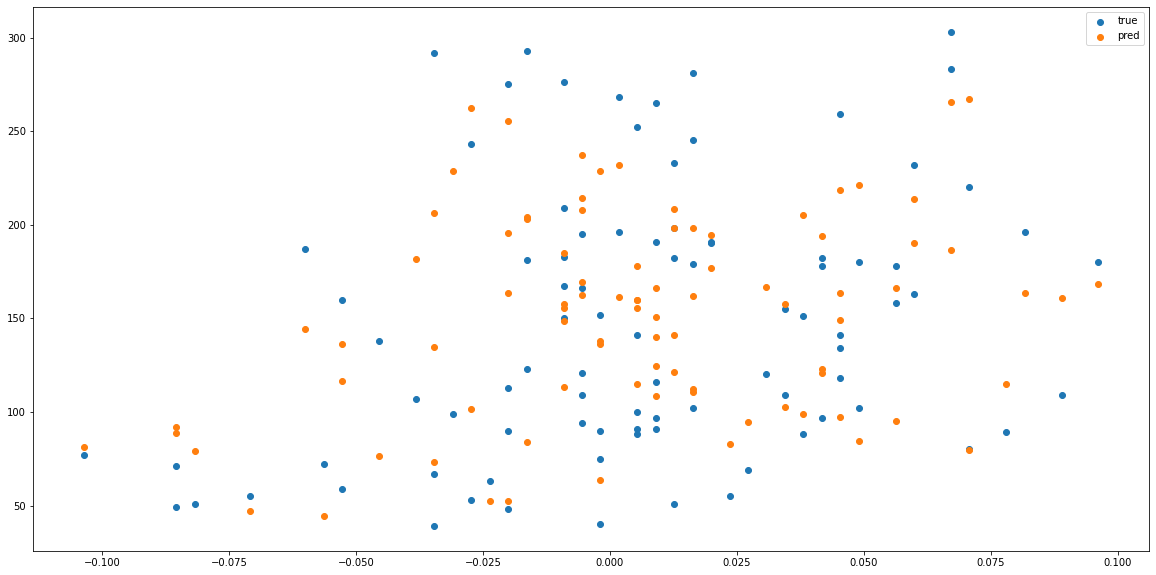

In [79]:
plt.scatter(X_test_del[:, 0], y_test, label="true")
plt.scatter(X_test_del[:, 0], prediction, label="pred")
plt.legend()
plt.show()

>    

>    

>    

>    

---
# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

---
## (1) 데이터 가져오기

In [18]:
path_file = 'https://raw.githubusercontent.com/twelvesense/first-repository/master/data/train.csv'
train = pd.read_csv(path_file)

https://www.kaggle.com/c/bike-sharing-demand/data

'''
datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 
Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals 

---
## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [19]:
train.shape

(10886, 12)

In [20]:
train.keys()   

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [21]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [22]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [23]:
train.keys()   

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

---
## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

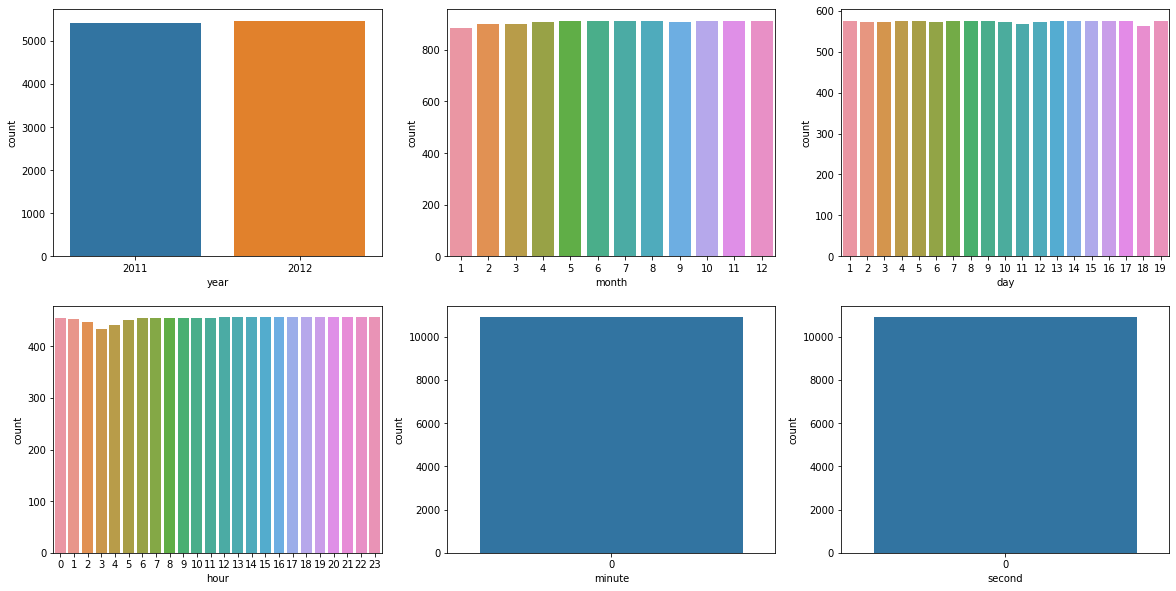

In [25]:
fig, axes= plt.subplots(2,3)
plt.rcParams["figure.figsize"] = (20, 10)
sns.countplot(train['year'], ax=axes[0, 0])
sns.countplot(train['month'], ax=axes[0, 1])
sns.countplot(train['day'], ax=axes[0, 2])
sns.countplot(train['hour'], ax=axes[1, 0])
sns.countplot(train['minute'], ax=axes[1, 1])
sns.countplot(train['second'], ax=axes[1, 2])
fig.show()

---
## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [26]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute', 'second']].values
y = train['count'].values

In [27]:
## finding NaN
board_NaN = ''
if sum(np.isnan(X[:,0]))    != 0: board_NaN.append('season')         # season     
if sum(np.isnan(X[:,1]))    != 0: board_NaN.append('-holiday')       # holiday    
if sum(np.isnan(X[:,2]))    != 0: board_NaN.append('-workingday')    # workingday
if sum(np.isnan(X[:,3]))    != 0: board_NaN.append('-weather')       # weather    
if sum(np.isnan(X[:,4]))    != 0: board_NaN.append('-temp')          # temp         
if sum(np.isnan(X[:,5]))    != 0: board_NaN.append('-atemp')         # atemp        
if sum(np.isnan(X[:,6]))    != 0: board_NaN.append('-humidity')      # humidity    
if sum(np.isnan(X[:,7]))    != 0: board_NaN.append('-windspeed')     # windspeed   
if sum(np.isnan(X[:,8]))    != 0: board_NaN.append('-casual')        # casual        
if sum(np.isnan(X[:,9]))    != 0: board_NaN.append('-registered')    # registered   
if sum(np.isnan(X[:,10]))   != 0: board_NaN.append('-year')          # year          
if sum(np.isnan(X[:,11]))   != 0: board_NaN.append('-month')         # month         
if sum(np.isnan(X[:,12]))   != 0: board_NaN.append('-day')           # day           
if sum(np.isnan(X[:,13]))   != 0: board_NaN.append('-hour')          # hour          
if sum(np.isnan(X[:,14]))   != 0: board_NaN.append('-minute')        # minute         
if sum(np.isnan(X[:,15]))   != 0: board_NaN.append('-second')        # second          
if sum(np.isnan(y))         != 0: board_NaN.append('-y')
if board_NaN == '': 
    print("Nothing")
else:
    print(board_NaN)

Nothing


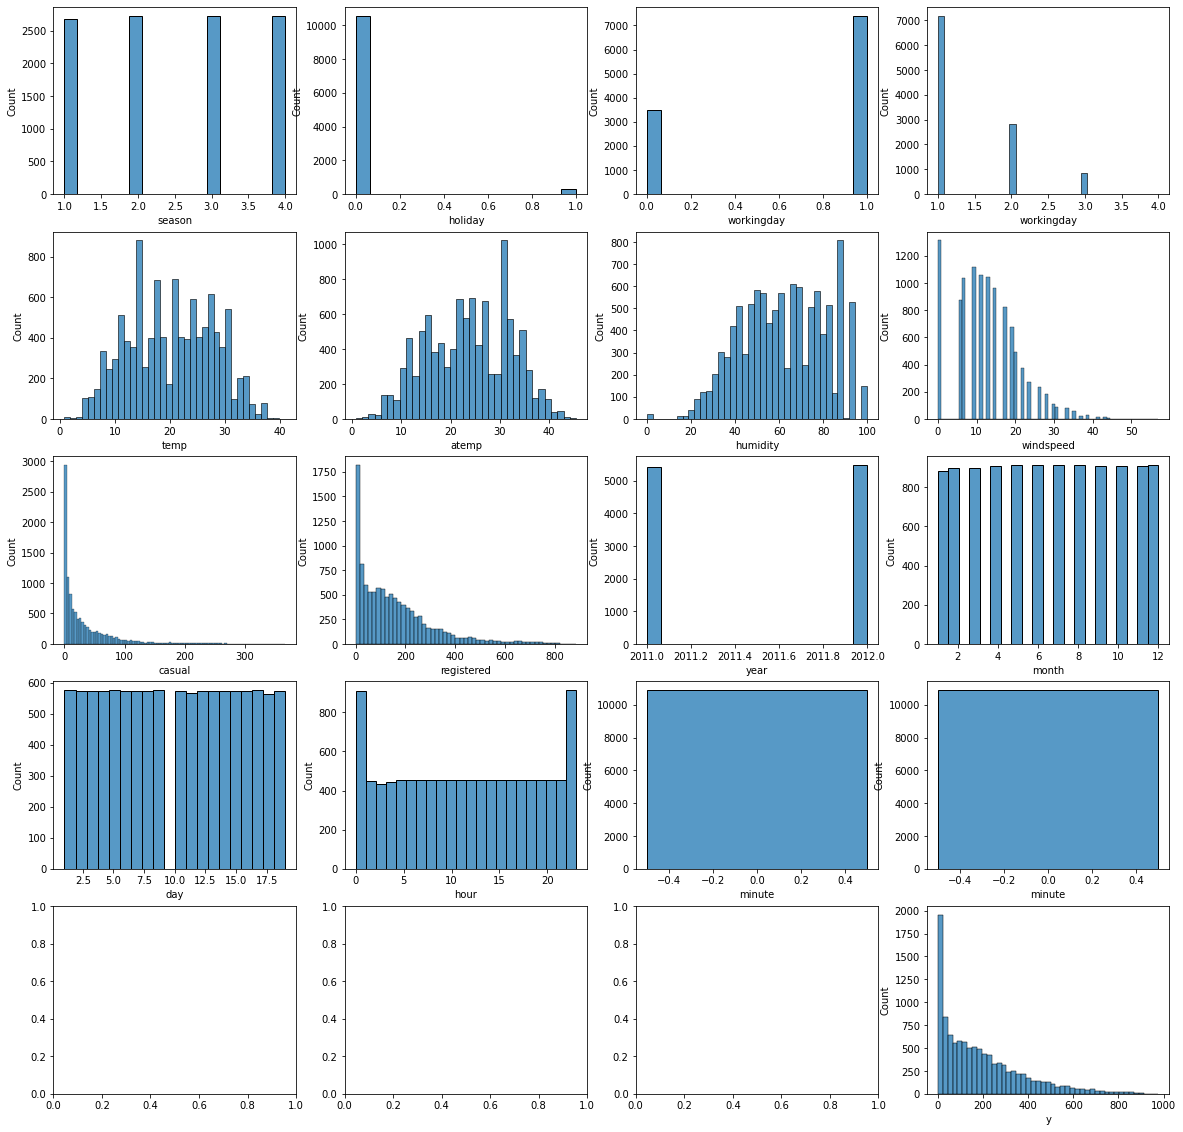

In [35]:
## finding outlier
fig, axes= plt.subplots(5,4)
plt.rcParams["figure.figsize"] = (20, 30)
p00 = sns.histplot(X[:,0], ax=axes[0,0])               # season
p01 = sns.histplot(X[:,1], ax=axes[0,1])               # holiday
p02 = sns.histplot(X[:,2], ax=axes[0,2])               # workingday
p03 = sns.histplot(X[:,3], ax=axes[0,3])               # weather
p04 = sns.histplot(X[:,4], ax=axes[1,0])               # temp
p05 = sns.histplot(X[:,5], ax=axes[1,1])               # atemp
p06 = sns.histplot(X[:,6], ax=axes[1,2])               # humidity
p07 = sns.histplot(X[:,7], ax=axes[1,3])               # windspeed
p08 = sns.histplot(X[:,8], ax=axes[2,0])               # casual
p09 = sns.histplot(X[:,9], ax=axes[2,1])               # registered
p10 = sns.histplot(X[:,10], ax=axes[2,2])              # year
p11 = sns.histplot(X[:,11], ax=axes[2,3])              # month
p12 = sns.histplot(X[:,12], ax=axes[3,0])              # day
p13 = sns.histplot(X[:,13], ax=axes[3,1])              # hour
p14 = sns.histplot(X[:,14], ax=axes[3,2])              # minute
p15 = sns.histplot(X[:,15], ax=axes[3,3])              # second
p16 = sns.histplot(y, ax=axes[4,3])
p00.set(xlabel = "season")
p01.set(xlabel = "holiday")
p02.set(xlabel = "workingday")
p03.set(xlabel = "workingday")
p04.set(xlabel = "temp")
p05.set(xlabel = "atemp")
p06.set(xlabel = "humidity")
p07.set(xlabel = "windspeed")
p08.set(xlabel = "casual")
p09.set(xlabel = "registered")
p10.set(xlabel = "year")
p11.set(xlabel = "month")
p12.set(xlabel = "day")
p13.set(xlabel = "hour")
p14.set(xlabel = "minute")
p15.set(xlabel = "minute")
p16.set(xlabel = "y")
fig.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

---
## (5) LinearRegression 모델 학습

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

---
## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [40]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("mse: \n", mse)
print("rmse: \n", rmse)

mse: 
 3.867634345141333e-27
rmse: 
 6.219030748550237e-14


---
## (7) x축은 temp로, y축은 count로 예측 결과 시각화하기

### 7-1) 실제값과 예측치를 겹쳐서 표시하여 비교하기

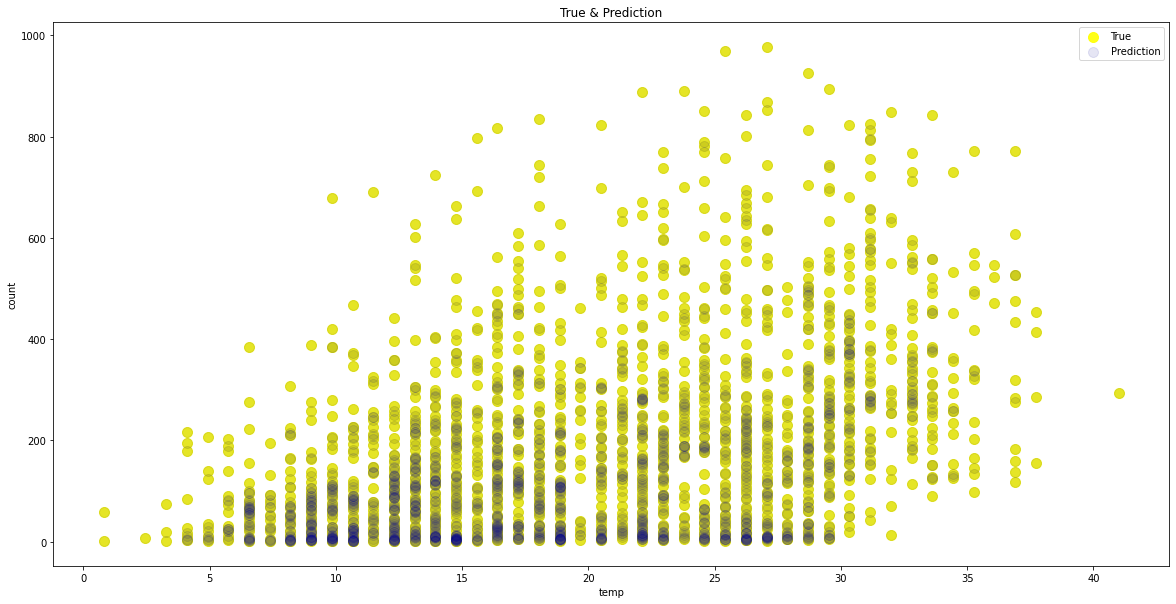

In [46]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.scatter(X_test[:, 4], y_test, s=100, c='#ffff00', alpha=0.9, label="True")
plt.scatter(X_test[:, 4], predictions, s=100, c='#000099', alpha=0.1, label="Prediction")
plt.legend()
plt.title('True & Prediction')
plt.xlabel('temp')
plt.ylabel('count')
plt.show(기

### 7-2) 실제값과 예측치의 차이를 표시하여 비교하기

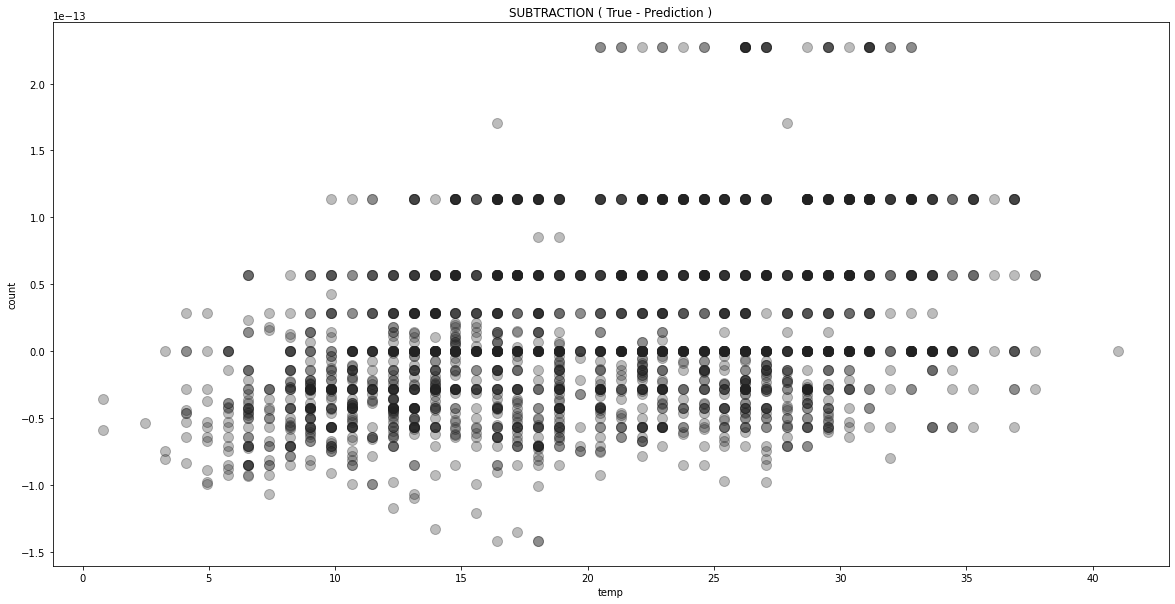

In [47]:
plt.scatter(X_test[:, 4], (y_test - predictions), s=100, c='#222222', alpha=0.3)
plt.title('SUBTRACTION ( True - Prediction )')
plt.xlabel('temp')
plt.ylabel('count')
plt.show()

### 7-3) 실제값과 예측치를 나란히 표시하여 비교하기

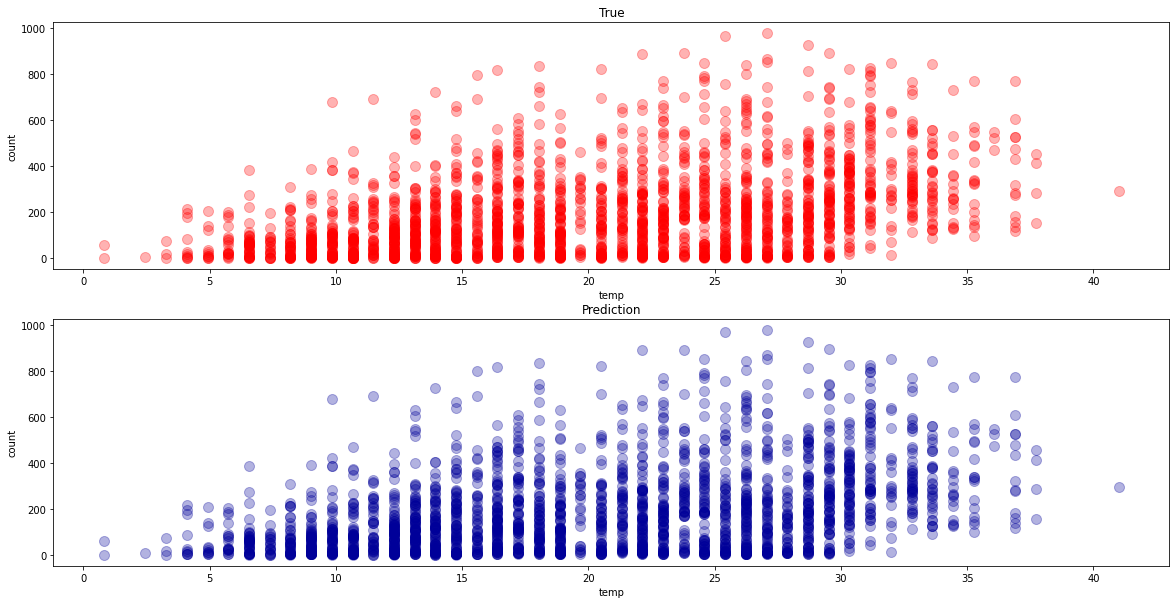

In [48]:
plt.subplot(2,1,1)
plt.scatter(X_test[:, 4], y_test, s=100, c='#ff0000', alpha=0.3)
plt.title('True')
plt.xlabel('temp')
plt.ylabel('count')
plt.subplot(2,1,2)
plt.scatter(X_test[:, 4], predictions, s=100, c='#000099', alpha=0.3)
plt.title('Prediction')
plt.xlabel('temp')
plt.ylabel('count')
plt.show()